Twitter Sentiment Analysis

In [1]:
# Description : This script can be used for sentiment analysis on twitter accounts.

In [2]:
# Installing the tweepy & wordcloud module for the usage in Juypter Notebooks
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
# Import the libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Importing the API credential data set
# Please note that you need a twitter developer account to get the tokens
# You have to create a .csv to with the header key and value

log = pd.read_csv("Login.csv", sep=';')


In [5]:
# Accessing the API credentials 
# Please make sure that you access the credentials correctly depending on your .csv

consumerKey = log["value"][0]
consumerSecret = log["value"][1]
accessToken = log["value"][2]
accessTokenSecret = log["value"][3]

In [6]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True) 

In [7]:
#Fetching basic account information

user = api.get_user('realDonaldTrump')
print("Follower Count: "+str(user.followers_count)+ '\n')

print("Friends Count: "+str(user.friends_count)+ '\n')

print("Account opened on: "+str(user.created_at)+ '\n')

print("Description: "+str(user.description)+ '\n')

print("Name: "+str(user.name)+ '\n')

print("Screen-Name: "+str(user.screen_name)+ '\n')

print("Total Tweets: "+str(user.statuses_count)+ '\n')

print("Verified User: "+str(user.verified)+ '\n')

Follower Count: 76104738

Friends Count: 47

Account opened on: 2009-03-18 13:46:38

Description: 45th President of the United States of America🇺🇸

Name: Donald J. Trump

Screen-Name: realDonaldTrump

Total Tweets: 50457

Verified User: True



In [8]:
# Extracting the last 100 tweets from the respective twitter user account
posts = api.user_timeline(screen_name="realDonaldTrump", count = 100, lang ="en", tweet_mode="extended")

#  Printing the last 5 tweets of the extracted 100 tweets
print("The 5 most recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

The 5 most recent tweets:

1) Joe Biden wanted the date for the Democrat National Convention moved to a later time period. Now he wants a “Virtual” Convention, one where he doesn’t have to show up. Gee, I wonder why? Also, what ever happened to that phone call he told the Fake News he wanted to make to me?

2) RT @realDonaldTrump: Advertising in the Failing New York Times is WAY down. Washington Post is not much better. I can’t say whether this is…

3) RT @WhiteHouse: President @realDonaldTrump expressed America's well wishes to Prime Minister Boris Johnson for a speedy recovery. https://t…

4) RT @KatrinaPierson: Starting TONIGHT! 

@TeamTrump #WarRoomWeekly

Following the @realDonaldTrump Covid-19 update!! 

#KAG2020 🇺🇸

5) RT @DonaldJTrumpJr: Take a look back and RT what the liberal media and Joe Biden said about President Trump's aggressive, early response to…



In [9]:
# Creating a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Showing the first 5 rows of the dataframe
df.head()

,Tweets
0,Joe Biden wanted the date for the Democrat Nat...
1,RT @realDonaldTrump: Advertising in the Failin...
2,RT @WhiteHouse: President @realDonaldTrump exp...
3,RT @KatrinaPierson: Starting TONIGHT! \n\n@Tea...
4,RT @DonaldJTrumpJr: Take a look back and RT wh...


In [10]:
# Creating a function to clean the tweets from stop words
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
print(df)

                                               Tweets
0   Joe Biden wanted the date for the Democrat Nat...
1   : Advertising in the Failing New York Times is...
2   : President  expressed America's well wishes t...
3   : Starting TONIGHT! \n\n WarRoomWeekly\n\nFoll...
4   : Take a look back and what the liberal media ...
5   Advertising in the Failing New York Times is W...
6   : BREAKING: Coronavirus Outbreak. Good news on...
7   : So dumbfounded that the Democrats would rath...
8   : I don't know anyone in the last three years ...
9                     LIGHT AT THE END OF THE TUNNEL!
10                                        USA STRONG!
11  Thank you Gayle. I only wish the public could ...
12  For humanitarian reasons, the passengers from ...
13  .  “To this day the establishment media have n...
14                                                   
15                                                   
16  White House news conference at 6:45 P.M. Easte...
17  We are learning much abo

In [11]:
# Creating a function to get the subjectivity from textblob
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity from textblob
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Creating two new columns including the 'Subjectivity' & 'Polarity' data
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
print(df)

                                               Tweets  Subjectivity  Polarity
0   Joe Biden wanted the date for the Democrat Nat...      0.366667 -0.100000
1   : Advertising in the Failing New York Times is...      0.414478 -0.089731
2   : President  expressed America's well wishes t...      0.000000  0.000000
3   : Starting TONIGHT! \n\n WarRoomWeekly\n\nFoll...      0.100000  0.000000
4   : Take a look back and what the liberal media ...      0.150000  0.050000
5   Advertising in the Failing New York Times is W...      0.545905 -0.319810
6   : BREAKING: Coronavirus Outbreak. Good news on...      0.300000  0.350000
7   : So dumbfounded that the Democrats would rath...      0.900000  0.600000
8   : I don't know anyone in the last three years ...      0.283333  0.250000
9                     LIGHT AT THE END OF THE TUNNEL!      0.700000  0.500000
10                                        USA STRONG!      0.733333  0.541667
11  Thank you Gayle. I only wish the public could ...      0.595

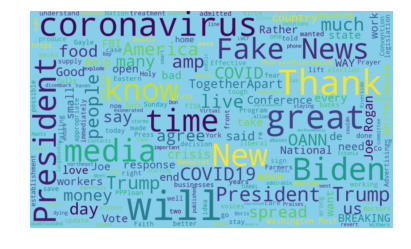

In [12]:
# Visualizing the words cointained in the tweets in a word cloud.
# If a word is often used it appears big and bold in the word cloud.

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=110, background_color="skyblue").generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getSentiment(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


df['Sentiment'] = df['Polarity'].apply(getSentiment)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Sentiment
0,Joe Biden wanted the date for the Democrat Nat...,0.366667,-0.100000,Negative
1,: Advertising in the Failing New York Times is...,0.414478,-0.089731,Negative
2,: President expressed America's well wishes t...,0.000000,0.000000,Neutral
3,: Starting TONIGHT! \n\n WarRoomWeekly\n\nFoll...,0.100000,0.000000,Neutral
4,: Take a look back and what the liberal media ...,0.150000,0.050000,Positive
5,Advertising in the Failing New York Times is W...,0.545905,-0.319810,Negative
6,: BREAKING: Coronavirus Outbreak. Good news on...,0.300000,0.350000,Positive
7,: So dumbfounded that the Democrats would rath...,0.900000,0.600000,Positive
8,: I don't know anyone in the last three years ...,0.283333,0.250000,Positive
9,LIGHT AT THE END OF THE TUNNEL!,0.700000,0.500000,Positive


In [15]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) : Take a look back and what the liberal media and Joe Biden said about President Trump's aggressive, early response to…

2) : BREAKING: Coronavirus Outbreak. Good news on multiple fronts

US today now at 23,373, yesterday at this time was 30,571.…

3) : So dumbfounded that the Democrats would rather revert to subpoenas than find solutions to the unprecedented crisis we are wo…

4) : I don't know anyone in the last three years who has done more to help Vladimir Putin and Russia with their efforts to sow…

5) LIGHT AT THE END OF THE TUNNEL!

6) USA STRONG!

7) For humanitarian reasons, the passengers from the two CoronaVirus stricken cruise ships have been given medical treatment and, when appropriate, allowed to disembark, under strict supervision. Very carefully done. People we’re dying &amp; no other countries would allow them to dock!

8) We are learning much about the Invisible Enemy. It is tough and smart, but we are tougher and smarter!

9) : . said "

In [16]:
# Printing negative tweets 
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Sentiment'][i] == 'Negative'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1


Printing negative tweets:

1) Joe Biden wanted the date for the Democrat National Convention moved to a later time period. Now he wants a “Virtual” Convention, one where he doesn’t have to show up. Gee, I wonder why? Also, what ever happened to that phone call he told the Fake News he wanted to make to me?

2) : Advertising in the Failing New York Times is WAY down. Washington Post is not much better. I can’t say whether this is…

3) Advertising in the Failing New York Times is WAY down. Washington Post is not much better. I can’t say whether this is because they are Fake News sources of information, to a level that few can understand, or the Virus is just plain beating them up. Fake News is bad for America!

4) Thank you Gayle. I only wish the public could fully understand how corrupt &amp; dishonest so much of our Lamestream Media is. My Press Conferences are vital. They are reaching millions of people that are not being told the truth, &amp; haven’t been for years (Witch-Hunts, Fake

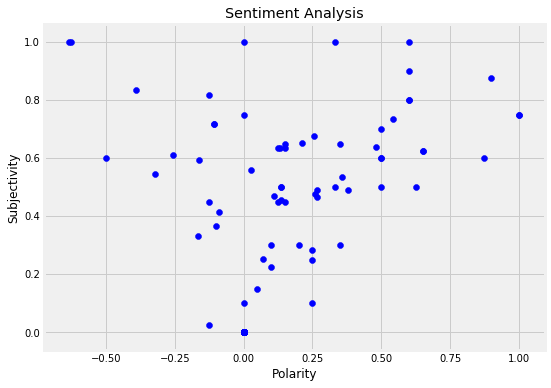

In [17]:
# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [18]:
# Print the percentage of positive tweets
ptweets = df[df.Sentiment == 'Positive']
ptweets = ptweets['Tweets']
ptweets

ptweets_percent = round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


In [19]:
print('The amount of positive tweets: ' + str(ptweets_percent) + '%')

The amount of positive tweets: 47.0%


In [20]:
# Print the percentage of negative tweets
ntweets = df[df.Sentiment == 'Negative']
ntweets = ntweets['Tweets']
ntweets

ntweets_percent = round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

In [21]:
print('The amount of negative tweets: ' + str(ntweets_percent) + '%')

The amount of negative tweets: 15.0%


In [22]:
# Showing the counts of sentiment
df['Sentiment'].value_counts()

Positive    47
Neutral     38
Negative    15
Name: Sentiment, dtype: int64

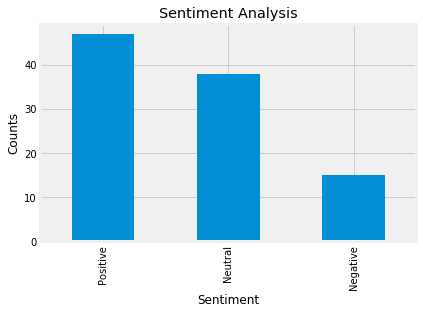

In [23]:
# Plotting the sentiment distribution
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()